<a href="https://colab.research.google.com/github/KalikaKay/Author-Classification-Project/blob/master/Unsupervised_BOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

Using unsupervised technique, visualize bar graphs for clusters containing 10 author documents. Adjust by silhouette scores. 

*(Check out [YellowBrick's visualization tools](https://www.scikit-yb.org/en/latest/api/cluster/icdm.html))*

# Data Cleaning



In [1]:
#Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

#Cluster Visualizations
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#NLP 
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from gensim.summarization import keywords
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer


import numpy as np
import pandas as pd


# file location
PATH = '/content/drive/MyDrive/Author Classification/AuthorTexts'
DOC_PATTERN = r'.*\.txt'

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Dataframe of sentences and authors.
for fileid in corpus.fileids():
  book = pd.DataFrame(corpus.raw(fileids=fileid).split('\n'), columns=['sentence'])
  book['author'] = fileid.split('/')[0]
  try:
    books = pd.concat([books, book])
  except NameError: 
    books = book

In [4]:
#Remove empty strings.
books = books.replace(r'^\s*$', np.NaN, regex=True)
books.dropna(inplace=True)
books.reindex()

#Remove contents and Chapter Titles.
i = 0
for sent in books.sentence:
  if any(c.islower() for c in sent) == False:
    books.iloc[i] = np.NaN
  if 'project gutenberg' in sent.lower():
    books.iloc[i] = np.NaN    
  if 'contents' == sent.lower().strip():
    books.iloc[i] == np.NaN
  i += 1

books.dropna(inplace=True)
books.reindex()
#drop the content headers.
content_index = books[books.sentence == 'Contents '].index.values
books.drop(content_index, inplace=True)

# Feature Engineering

In [5]:

#Tokenize the data
tokenizer = RegexpTokenizer(r'\w+')
books['tokenized'] = [tokenizer.tokenize(sent.lower()) for sent in books.sentence 
                   if tokenizer.tokenize(sent.lower()) not in stopwords.words('english')]

In [6]:
# Lemmatize the tokens. 
lemmatizer = WordNetLemmatizer()
lemmatized = []
for token in books.tokenized:
  lemmatized.append([lemmatizer.lemmatize(word) for word in token])
books['lemmatized'] = lemmatized

In [7]:
#Bag of Words Vector
vectorizer = CountVectorizer(analyzer='word')
vectorized = vectorizer.fit_transform(books['lemmatized'].astype(str))

#KMeans Model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe192dc0b50>,
                 k=None, metric=None, model=None, timings=True)

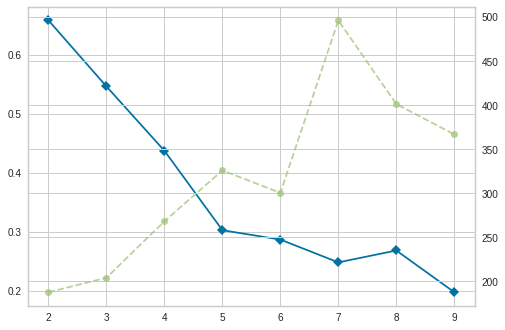

In [14]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(vectorized)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(vectorized)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1889e4450>,
                     model=None)

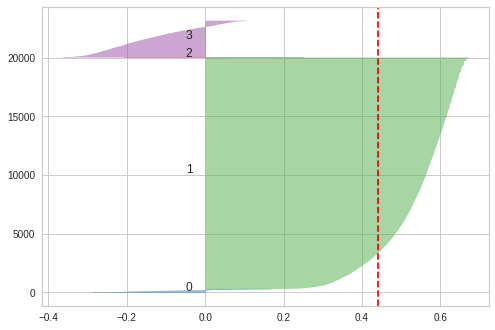

In [18]:
#Declare and fit the model. 
model = KMeans(n_clusters = 4, random_state=42)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(vectorized) # Fit the data to the visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1887cfcd0>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

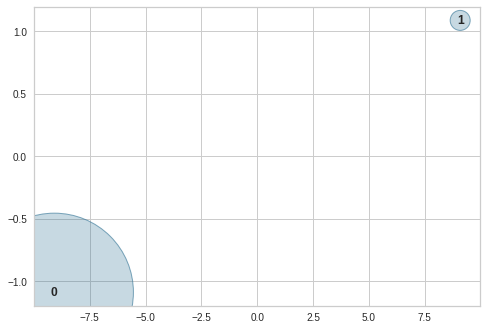

In [22]:
#Distance visualizer on two clusters.
model = KMeans(n_clusters = 2 )
visualizer = InterclusterDistance(model)
visualizer.fit(vectorized)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe188845050>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

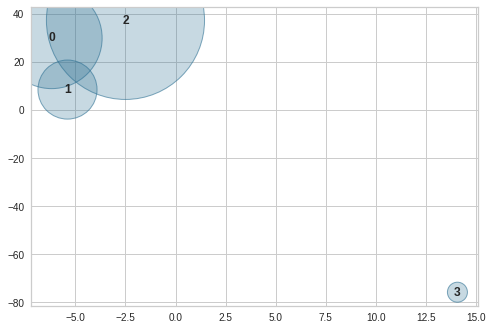

In [23]:
#Distance visualizer on four clusters.
model = KMeans(n_clusters = 4 )
visualizer = InterclusterDistance(model)
visualizer.fit(vectorized)

In [8]:
#fit on two clusters
model = KMeans(n_clusters = 2 )
clusters = model.fit_predict(vectorized)

In [9]:
books['kbow'] = clusters

In [49]:
#Which clusters contain 10 author documents? 
books[['kbow', 'author']].groupby(by='kbow').describe()

author                                
      count unique                top  freq
kbow                                       
0      1093      8  Fyodor Dostoevsky   440
1     22030      9      Ethel M. Dell  8554

In [27]:
books[['kbow', 'author']].groupby(by='kbow')['author'].value_counts()

kbow  author                     
0     Fyodor Dostoevsky               440
      Jane Austen                     241
      Emily Bronte                    162
      Anne Bronte                     124
      Ethel M. Dell                    75
      Various                          28
      Charlotte Bronte                 17
      Bell AKA Bronte Sisters           6
1     Ethel M. Dell                  8554
      Fyodor Dostoevsky              5134
      Jane Austen                    2434
      Various                        2176
      Emily Bronte                   1760
      Bell AKA Bronte Sisters         878
      Anne Bronte                     810
      Edith Rickert & Gleb Botkin     191
      Charlotte Bronte                 93
Name: author, dtype: int64

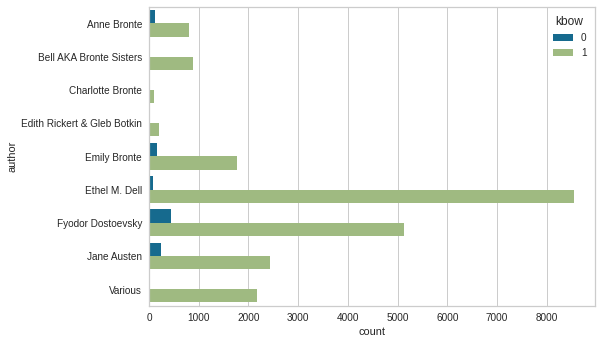

In [35]:
ax = sns.countplot(y='author', data=books[['kbow', 'author']], hue='kbow')

In [45]:
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800, 
                    stopwords=STOPWORDS, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

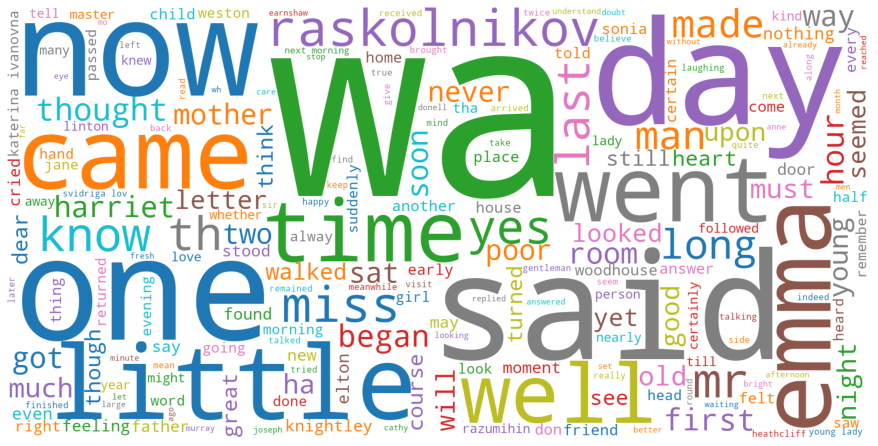

In [48]:
doc = books[books.kbow == 0]['lemmatized'].str.join(sep=' ')
wordcloud(doc.to_string())

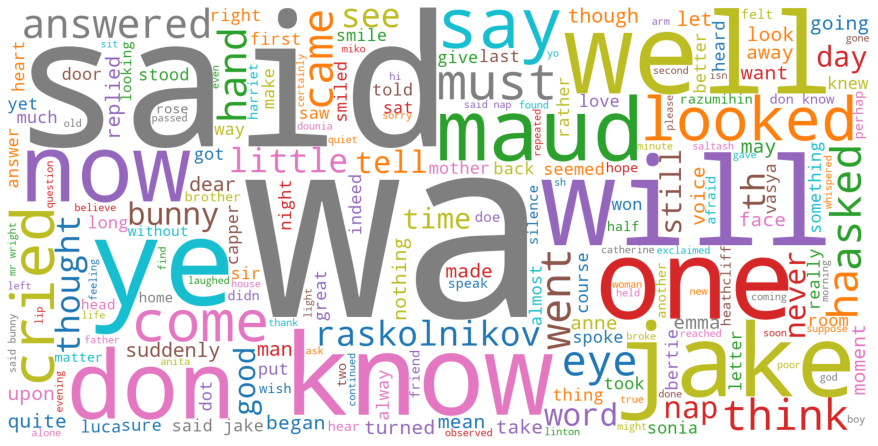

In [50]:
doc = books[books.kbow == 1]['lemmatized'].str.join(sep=' ')
wordcloud(doc.to_string())

# Agglomerative Cluster Model

In [10]:
model = AgglomerativeClustering(n_clusters=2)
books['abow'] = model.fit_predict(vectorized.toarray())

In [53]:
#Which books contain 10 author documents? 
books[['abow', 'author']].groupby(by='abow').describe()

author                                
      count unique                top  freq
abow                                       
0      2438      8  Fyodor Dostoevsky   854
1     20685      9      Ethel M. Dell  8263

# DB Scan

In [12]:
# Defining the agglomerative clustering
dbscan = DBSCAN(eps=25, min_samples=2)

# Fit model
db = dbscan.fit(vectorized)
#get the clusters
clusters = db.labels_
books['dbow'] = clusters

#Run some metrics.
(unique, counts) = np.unique(clusters, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies, metrics.silhouette_score(vectorized, clusters))

[[   -1   141]
 [    0 22982]] 0.829111805261191


The following visualization was retrieved from the sci-kit learns' [DBScan demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py).

Estimated number of clusters: 1
Estimated number of noise points: 141
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.829


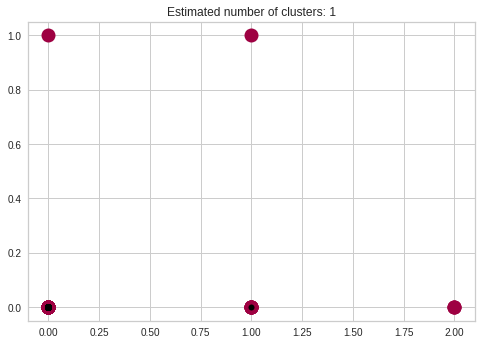

In [13]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true = db.labels_
X = vectorized.toarray()

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Gaussian Mixture Model

I wanted to run some gaussian mixture models, but google colab runs out RAM. I'm okay with this; there aree plenty of other models to choose from. The code snippets are left below for future reference. 

In [8]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type='full')

# Fit model
clusters = gmm_cluster.fit_predict(vectorized.toarray())
books['gbow'] = clusters
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(vectorized.toarray(), clusters)))

# Parquet
For ease of manipulation in other notebooks, save the clustered and lemmatized works to parquet file. 

In [13]:
books.to_parquet(path='/content/drive/MyDrive/Author Classification/Books/Books.parquet')

# Conclusion


Four clustering models were run against the books dataset using bag of words. K-Means has the best resource to offer with regards to telling a story with the data. 

The KMeans returned its highest silhouette score with a cluster set to two. A higher silhouette score was returned from DBScan with a higher epsilon that returned a single cluster and a few outliers. The higher the epsilon value, the higher the silhouette score. The agglomerative model timed out with a cluster parameter greater than two. A gaussian mixture model requires more RAM. 

The word cloud run from the KMeans results suggests that the type and number of words in the smaller KMeans cluster have some similarties to the larger cluster and the clustering also does not appear to be based on author. 

With such a low silhouette score and the relative result from DBScan, I suspect that one or many of the following is occuring:

*   There is not enough data to cluster the model on.
*   I have chosen the wrong feature engineering technique for this custering.
*   The authors may need to be included as dummy variables in order to provide a clearer picture to classify these works.

---
*a Thinkful Project by Kalika Kay Curry*
